# SVR이란
선형, 비선형 회귀에서도 사용할 수 있습니다. SVM 분류가 아니라 회귀에서 적용하는 방법은 목표를 반대로 하는 것입니다.

일정한 마진 오류안에서 두 클래스 간의 도로 폭이 가능한 한 최대가 되도록 하는 대신, 
SVM회귀는 제한된 마진 오류 (즉, 도로밖의 샘플) 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습합니다.


In [1]:
import numpy as np
np.random.seed(42)
m = 50

X = 2*np.random.rand(m,1)
y = (4 + 3 * X + np.random.randn(m,1)).ravel()

In [2]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, random_state = 42)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5, random_state=42)

In [19]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

C:\Users\user\AppData\Local\Temp/ipykernel_19680/653537954.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(X, y, "bo", marker='X', c='c')
C:\Users\user\AppData\Local\Temp/ipykernel_19680/653537954.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, y, "bo", marker='X', c='c')
C:\Users\user\AppData\Local\Temp/ipykernel_19680/653537954.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(X, y, "bo", marker='X', c='c')
C:\Users\user\AppData\Local\Temp/ipykernel_19680/653537954.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument wi

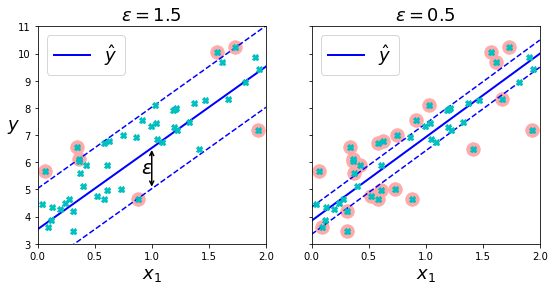

In [26]:
import matplotlib.pyplot as plt
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "b-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "b--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "b--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo", marker='X', c='c')
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

도로의 폭은 하이퍼파라미터 epsilon으로 조절합니다. 

위의 그림에서 무작위로 생성한 선형 데이터셋에 훈련시킨 두 개의 선형 SVM 회귀 모델을 보여줍니다

하나는 마진을 크게 (epsilon=1.5)하고 다른 하나는 마진을 작게 (epsilon=0.5)하여 만들었습니다.

​

보이는 것과 같이 마진안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없습니다.
그래서 이 모델을 epsilon에 민감하지 않다(epsilon-insensitive)고 말합니다.

In [28]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1) - 1
y = (0.2 + 0.1*X + 0.5*X**2 + np.random.randn(m,1)/10).ravel()

In [30]:
from sklearn.svm import SVR
svm_poly_reg1 = SVR(kernel = 'poly', degree=2, C=100, epsilon= 0.1,gamma='scale')
svm_poly_reg2 = SVR(kernel = 'poly', degree=2, C=0.01, epsilon= 0.1,gamma='scale')
svm_poly_reg1.fit(X,y)
svm_poly_reg2.fit(X,y)

SVR(C=0.01, degree=2, kernel='poly')

C:\Users\user\AppData\Local\Temp/ipykernel_19680/653537954.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(X, y, "bo", marker='X', c='c')
C:\Users\user\AppData\Local\Temp/ipykernel_19680/653537954.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, y, "bo", marker='X', c='c')
C:\Users\user\AppData\Local\Temp/ipykernel_19680/653537954.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(X, y, "bo", marker='X', c='c')
C:\Users\user\AppData\Local\Temp/ipykernel_19680/653537954.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument wi

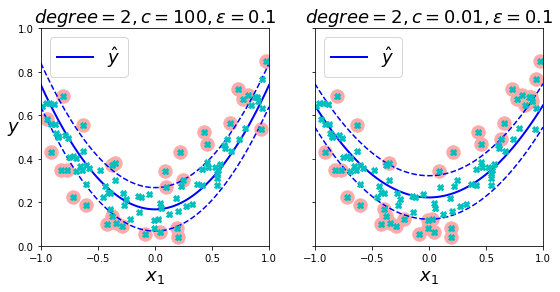

In [32]:
fig,axes = plt.subplots(ncols=2,figsize=(9,4),sharey = True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1,X,y,[-1,1,0,1])
plt.title(r"$degree={},c={},\epsilon={}$".format(svm_poly_reg1.degree,svm_poly_reg1.C,svm_poly_reg1.epsilon),fontsize=18)
plt.ylabel(r"$y$", fontsize=18,rotation = 0)

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2,X,y,[-1,1,0,1])
plt.title(r"$degree={},c={},\epsilon={}$".format(svm_poly_reg2.degree,svm_poly_reg2.C,svm_poly_reg2.epsilon),fontsize=18)

plt.show()

비선형 회귀 작업을 처리하려면 커널 SVM 모델을 사용합니다.

위의 그림은 2차방정식 형태의 훈련세트에 2차 다항 커널을 사용한 SVM 회귀를 보여줍니다.

왼쪽 그래프는 규제가 거의 없고 (즉, 아주 큰 C), 오른쪽 그래프는 규제가 훨씬 많습니다(즉, 작은 C)

C:\Users\user\AppData\Local\Temp/ipykernel_19680/653537954.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(X, y, "bo", marker='X', c='c')
C:\Users\user\AppData\Local\Temp/ipykernel_19680/653537954.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, y, "bo", marker='X', c='c')
C:\Users\user\AppData\Local\Temp/ipykernel_19680/653537954.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(X, y, "bo", marker='X', c='c')
C:\Users\user\AppData\Local\Temp/ipykernel_19680/653537954.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument wi

Text(0.5, 1.0, '$degree=3,C=0.01,\\epsilon = 0.1$')

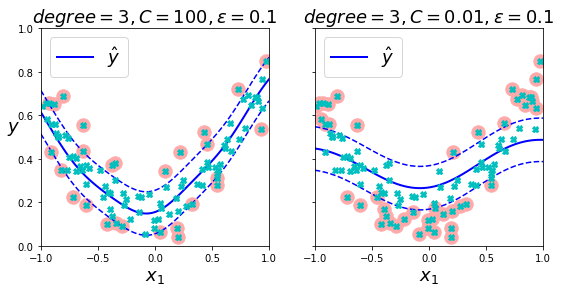

In [34]:
svm_rbf_reg1 = SVR(kernel='rbf',C=100,epsilon=0.1,gamma='scale')
svm_rbf_reg2 = SVR(kernel='rbf',C=0.01,epsilon=0.1,gamma='scale')
svm_rbf_reg1.fit(X,y)
svm_rbf_reg2.fit(X,y)

fig,axes = plt.subplots(ncols = 2 , figsize = (9,4), sharey = True)
plt.sca(axes[0])
plot_svm_regression(svm_rbf_reg1,X,y,[-1,1,0,1])
plt.title(r"$degree={},C={},\epsilon = {}$".format(svm_rbf_reg1.degree,svm_rbf_reg1.C,svm_rbf_reg1.epsilon),fontsize=18)
plt.ylabel(r"$y$",fontsize=18,rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_rbf_reg2,X,y,[-1,1,0,1])
plt.title(r"$degree={},C={},\epsilon = {}$".format(svm_rbf_reg2.degree,svm_rbf_reg2.C,svm_rbf_reg2.epsilon),fontsize=18)

In [37]:
from sklearn import datasets
import pandas as pd

boston = datasets.load_boston()
df_boston = pd.DataFrame(boston.data,columns = boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head(5)

C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


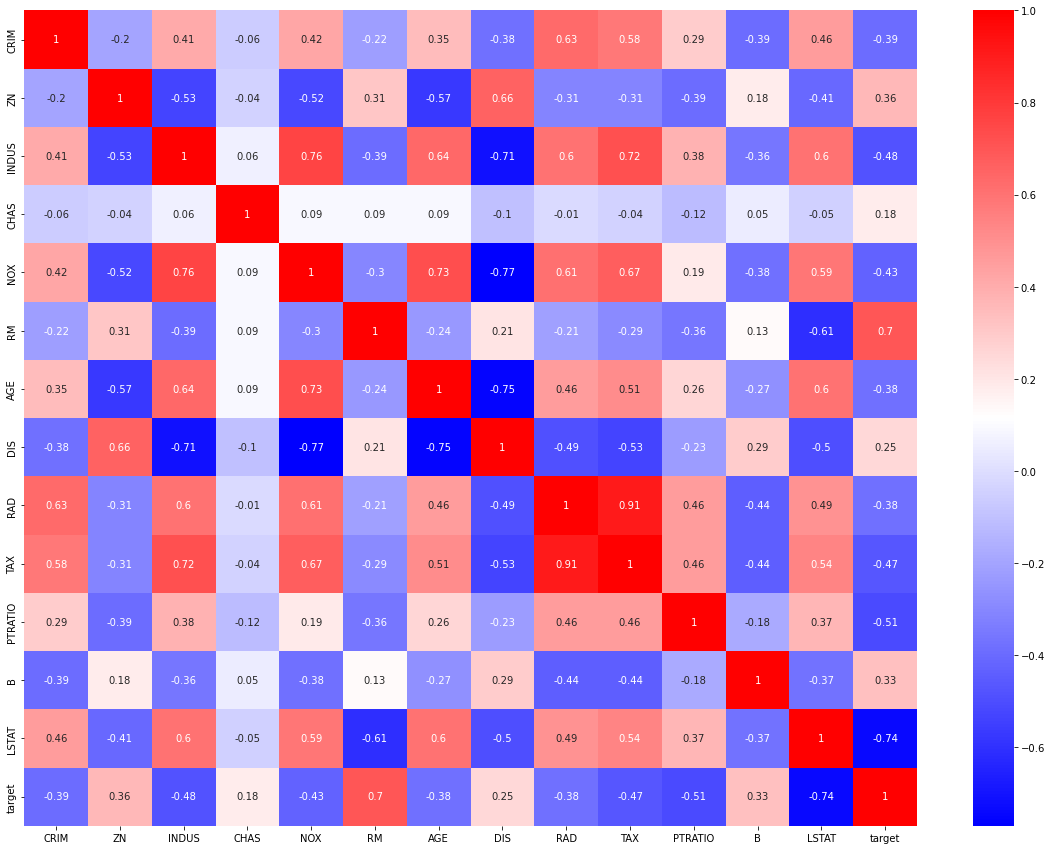

In [40]:
import seaborn as sns
correlation_matrix = df_boston.corr().round(2)
plt.subplots(figsize = (20,15))
sns.heatmap(data = correlation_matrix, annot = True, cmap = "bwr")
plt.show()

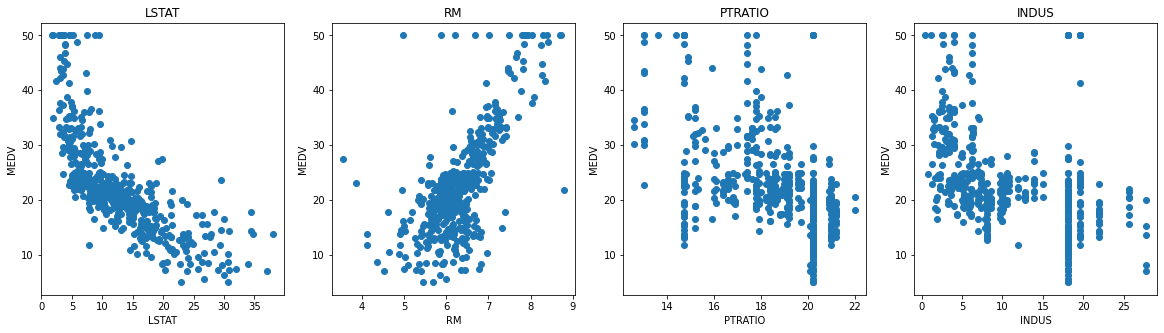

In [41]:
plt.subplots(1,4,figsize = (20,5))

features = ['LSTAT','RM','PTRATIO','INDUS']
target = boston.target
for i, col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x = df_boston[col]
    y = target
    plt.scatter(x,y,marker = 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
plt.show()

In [44]:
X = df_boston.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO' , 'B' , 'target'], axis=1)
Y = df_boston.iloc[:, -1].values
X,Y

(     LSTAT
 0     4.98
 1     9.14
 2     4.03
 3     2.94
 4     5.33
 ..     ...
 501   9.67
 502   9.08
 503   5.64
 504   6.48
 505   7.88
 
 [506 rows x 1 columns],
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
        20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
        23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
        33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
        21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
        20.3, 2

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 5)

In [46]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

In [47]:
svr_rbf_reg = SVR(kernel = 'rbf',C=100)
svr_rbf_reg.fit(X_train,y_train)

SVR(C=100)

In [51]:
print("test Data 예측값:\n", svr_rbf_reg.predict(X_test))

test Data 예측값:
 [40.99387782 31.65143929 22.08127141  8.92934489 24.68292155 13.30421812
 27.51026542 22.50073441 21.78363984 19.25466526 25.70011328 21.85626122
 21.81688531 23.94463763 22.79156555 20.73749388  8.54864551 20.25939039
 13.25211021 21.79256433 11.31772803 21.54951021 34.70083374 21.74591795
 22.67278082 12.69457565 24.06010885 21.1408235  27.36332662 28.08285793
 13.08993803 12.72127079 17.20421345 16.81106762 22.13610567 21.01121375
 21.89224777 12.80743701 26.5652654  48.53709814 18.42628984  8.58222495
 22.93455553 14.7361577  23.19949423 26.05675577 12.23984516 15.67335724
 19.51046882 12.75647678 19.52016522 20.64981079 22.03712867 13.73634391
 17.78080047 27.04155599 38.15785775 15.49256877 25.4739574  20.11289991
 19.28451864 21.79256433 16.36896783 32.21887557 21.41472405 14.14014797
 20.64235575 23.13243312 21.83224765 21.42715078 15.01210505 26.33811849
 17.35748839 14.13271448 21.08929289 32.6950838  19.18470064 13.09667056
 21.5043811  17.87433573 20.5895446

C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


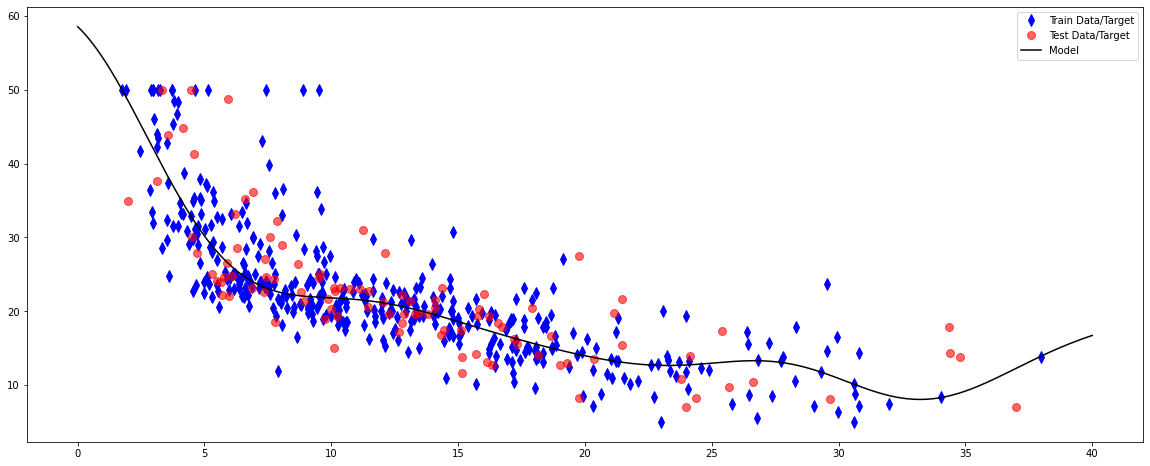

In [54]:
plt.figure(figsize = (20,8))
# -3과 3 사이에 1000개의 데이터 포인트를 만듭니다.
line = np.linspace(0,40,1000).reshape(-1,1)

# 모델링 결과
plt.plot(X_train,y_train,'d',c='b',markersize = 8)
plt.plot(X_test,y_test,'o',c='r', alpha=0.6,markersize = 8)
plt.plot(line,svr_rbf_reg.predict(line),c='black')
plt.legend(["Train Data/Target","Test Data/Target","Model"],loc = "best")



In [55]:
# R_square 모델 성능 평가
svr_rbf_reg.score(X_test,y_test)

0.6148501346719468

In [56]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg5 = KNeighborsRegressor(n_neighbors=5)
knn_reg5.fit(X_train,y_train)

print("test data pred:\n",knn_reg5.predict(X_test))
print("Test Set R_square : {:.4f}".format(knn_reg5.score(X_test,y_test)))

test data pred:
 [45.16 32.9  27.36 10.24 26.2  12.1  26.32 26.16 20.7  17.82 26.16 23.76
 23.2  26.48 26.32 19.3  10.24 21.14 13.66 20.92 14.58 22.18 34.12 20.74
 22.78 13.   25.62 19.6  25.98 25.34 12.92 13.4  16.8  15.7  22.52 20.04
 28.6  13.24 26.06 45.62 17.36 10.24 28.04 19.5  28.72 25.72 10.24 16.68
 19.78 13.24 20.18 21.48 28.7  11.88 17.88 26.3  33.38 16.62 25.6  19.66
 19.64 20.92 14.06 36.26 20.38 14.1  21.48 28.72 23.6  20.38 17.88 26.
 16.7  14.1  19.22 31.16 17.26 14.78 21.22 17.88 21.32 40.88 14.78 17.36
 19.86 17.24 17.36 12.2  17.88 23.2  29.9  21.56 20.38 15.6  32.76 29.44
 15.28 26.06 17.54 16.7  21.4  28.6 ]
Test Set R_square : 0.5967


C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


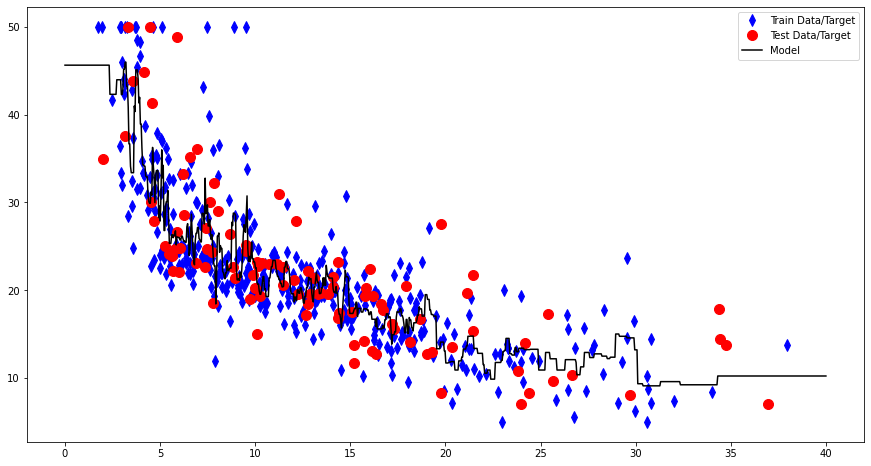

In [57]:
plt.figure(figsize=(15,8))
plt.plot(X_train,y_train,'d',c='b',markersize=8)
plt.plot(X_test,y_test,'o',c='r',markersize=10)
plt.plot(line,knn_reg5.predict(line),c='black')
plt.legend(["Train Data/Target","Test Data/Target","Model"],loc = "best")
